<a href="https://colab.research.google.com/github/MAHMOUDPD/modi/blob/master/Implementation_of_a_1D_wave_equation_with_an_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



The 1D *wave equation* is given as a PDE of the following form:
$$
\left\{\begin{array}{l}
u_{tt} = c^{2} u_{xx}, \\
u(0,x) = g(x), \\
u_{t}(0,x) = 0, \\
u(t,0) = u(t,1) = 0,
\end{array}\right.
$$
where $u = u(t,x)$ is a function of time $t \geq 0$ and (normalized) space $x \in [0,1]$, and the constant $c > 0$ is the wave speed.

Discretize the time domain (up to terminal time $T$) into $t_{0},t_{1},\cdots,t_{n}$ with $\Delta t = t_{n} - t_{n-1} = T/N$, and the spatial domain $x_{0},x_{1},\cdots,x_{M}$ with $\Delta x = x_{i} - x_{i-1} = 1/M$. Apply the finite difference to the above heat equation gives the formula
$$
u_{i}^{n+1} \approx -u_{i}^{n-1} + 2u_{i}^{n} + \left(c\frac{\Delta t}{\Delta x}\right)^2 (u_{i+1}^{n} - 2u_{i}^{n} + u_{i-1}^{n}) \qquad \forall i = 1,2,\cdots,M-1,\;\; \forall n = 0,1,2,\cdots,N-1,
$$
where $u_{i}^{-1} = u_{i}^{1}$ for all $i$. Again, we obtain $u_{i}^{n} \approx u(t_{n},x_{i})$.

**QUESTION**

(1) Define a function `fd_wave1d` which can be used to solve the above wave equations. \\
(2) Test your function with $c = 1$, $g(x) = \sin(2\pi x)$, $T = 1$, $N = 50$, $M = 40$. \\
(3) Use the code provided below to save figures and create a .gif animation of the solution. Also submit the .gif file.

In [ ]:
import numpy as np
import matplotlib.pyplot  as plt

#Solution
(1) Define a function `fd_wave1d` which can be used to solve the above wave equations.

In [ ]:
def fd_wave1d(c, g, M, N, T  ):
  '''
  Inputs: "g" is a test function, while c, M, N, and T are constants
  Output: t, x, U
  '''
  # initializations 
  t = np.linspace(0, T, N+1)
  x = np.linspace(0, 1, M+1)

  U = np.zeros((N+1, M+1))
  U[0,:] = g(x)


  dt = T/N
  dx = (c*T*(M)/N)**2

  for n in range(1, N+1):

    if n == 1:
      U[n, 1:-1] = U[n-1, 1:-1] +  dx*(U[n-1, 2:] - 2*U[n-1, 1:-1] + U[n-1, :-2])
    else:
      U[n, 1:-1] = -U[n-2, 1:-1] + 2*U[n-1, 1:-1] + dx*(U[n-1, 2:] - 2*U[n-1, 1:-1] + U[n-1, :-2])

    U[n, 0] =  0
    U[n, -1] = 0

  return t, x, U


(2) Test your function with $c = 1$, $g(x) = \sin(2\pi x)$, $T = 1$, $N = 50$, $M = 40$.

In [ ]:
g = lambda x: np.sin(2*np.pi*x)
c = 1
T = 1
N = 50
M = 40
t, x, U = fd_wave1d(c, g, M, N, T  ) # call the function to solve the test function
print(len(U))

51


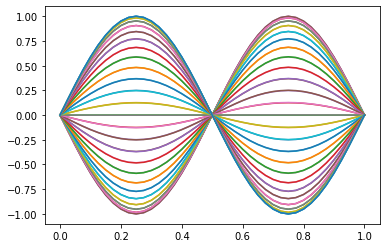

In [ ]:
# plot of the result
plt.plot(x, U.T)
plt.show()

(3) Use the code provided below to save figures and create a .gif animation of the solution. Also submit the .gif file.

*The following blocks are for .gif making. Do not forget to submit the .gif file.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Colab\ Notebooks/
%mkdir Figsol
%cd Figsol/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Colab Notebooks
mkdir: cannot create directory ‘Figsol’: File exists
/gdrive/MyDrive/Colab Notebooks/Figsol


In [ ]:
for n in range(0,50):
  # plt.subplot(50,1,n+1)
  fig = plt.figure()
  plt.plot(x,U[n,:])
  plt.ylim([-1,1])
  if n < 10:
    plt.savefig(f'sol_0{n}.jpg')
  else:
    plt.savefig(f'sol_{n}.jpg')
  plt.close(fig)

In [ ]:
import glob
from PIL import Image

fp_in = "sol_*.jpg"
fp_out = "sol.gif"

img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs, save_all=True, duration=200, loop=0)

---